## 1. Project Overview

Goal:
Apply the machine learning lifecycle to predict house prices using Linear Regression, focusing on data cleaning, feature engineering, model training, and evaluation.

Dataset: House Prices – Advanced Regression Techniques (Kaggle competition) 
Model: train.csv

## 2. Import Libraries

In [5]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 3. Load the Dataset

In [8]:
import os
print(os.getcwd())


/Users/student


In [13]:
data = pd.read_csv("/Users/student/Documents/AD331/train.csv")

In [14]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 4. Analyzing Missing Values

In [15]:
data.isnull().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64

In [31]:
# Impute LotFrontage using the median
# Step 1: Calculate the median of the 'LotFrontage' column
median_frontage = df['LotFrontage'].median()
# Step 2: Replace NaN values with the computed median
df['LotFrontage'] = df['LotFrontage'].fillna(median_frontage)
# Step 3: Verify that all NaNs were replaced
print(f"LotFrontage NaN count after imputation: {df['LotFrontage'].isnull().sum()}")

LotFrontage NaN count after imputation: 0


## 5. Featuring Engineering 

In [33]:
# Has Basement (Binary)
df['Has_Basement'] = (df['TotalBsmtSF'] > 0).astype(int)
print("\nFeature 6: Has_Basement created")
print(df['Has_Basement'].value_counts())


Feature 6: Has_Basement created
Has_Basement
1    1423
0      37
Name: count, dtype: int64


## 6. Model Implementation

In [35]:
# Select features (including engineered one)
X = df[['GrLivArea', 'Has_Basement']]
y = df['SalePrice']

In [36]:
# Split data (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train the Linear Regression Model

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully.")

# Initialize the model
lin_reg = LinearRegression()

# Train (fit) the model on the training data
lin_reg.fit(X_train, y_train)


Model trained successfully.


LinearRegression()

## 8. Evaluate the Model (MSE and R²)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 3347071273.37
R-squared (R²): 0.56


## 9. Visualize Actual vs Predicted Prices

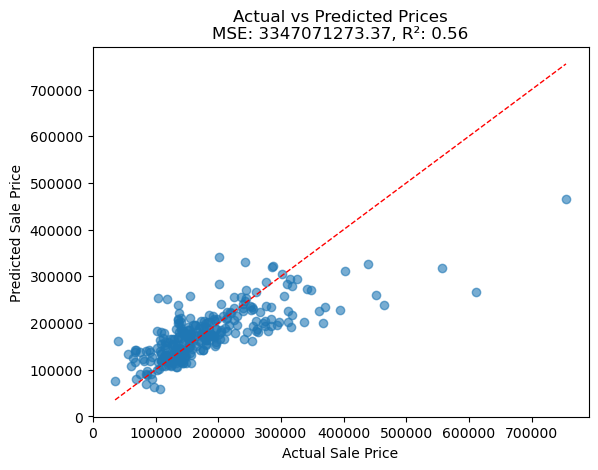

In [54]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=1)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title(f'Actual vs Predicted Prices\nMSE: {mse:.2f}, R²: {r2:.2f}')
plt.show()


## 9. Custom Predictions

In [42]:
custom_data = pd.DataFrame({
    'GrLivArea': [1500, 2500],
    'Has_Basement': [1, 0]
})

predictions = model.predict(custom_data)
for i, price in enumerate(predictions):
    print(f"Predicted price for house {i+1}: ${price:,.2f}")


Predicted price for house 1: $179,949.58
Predicted price for house 2: $227,686.89
